<a href="https://colab.research.google.com/github/TanTruong24/Faster_RCNN_for_face_mask_detection/blob/master/Object_Detection_DataPreprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tensorflow==2.0

     |████████████████████████████████| 86.3 MB 45 kB/s 
     |████████████████████████████████| 50 kB 5.2 MB/s 
     |████████████████████████████████| 3.8 MB 57.9 MB/s 
     |████████████████████████████████| 449 kB 63.4 MB/s 
  Created wheel for gast: filename=gast-0.2.2-py3-none-any.whl size=7553 sha256=b00abd1647825b032d8247db14b2139d7c7e73cad7ec4177751fd4b9097298ec
  Stored in directory: /root/.cache/pip/wheels/21/7f/02/420f32a803f7d0967b48dd823da3f558c5166991bfd204eef3
Successfully built gast
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.5.0
    Uninstalling tensorflow-estimator-2.5.0:
      Successfully uninstalled tensorflow-estimator-2.5.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.5.0
    Uninstalling tensorboard-2.5.0:
      Successfully uninstalled tensorboard-2.5.0
  Attempting uninstall: gast
    Found existing installation: gast 0.4.0
    Uninstalling gast-0.4.0:
      Success

Reproduced with code from this excellent [blog](https://towardsdatascience.com/faster-r-cnn-object-detection-implemented-by-keras-for-custom-data-from-googles-open-images-125f62b9141a)

In [ ]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
import os
import pandas as pd
import random
from skimage import io
from shutil import copyfile
import sys
import time

import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array

In [ ]:
tf.__version__

'2.0.0'

###Load data

In [ ]:
!gdown --id 1E7I5EzudsDlDhrnbXrEk6VcYYfOFMW9k
!unzip faster-RCNN.zip

Downloading...
From: https://drive.google.com/uc?id=1E7I5EzudsDlDhrnbXrEk6VcYYfOFMW9k
To: /content/faster-RCNN.zip
986MB [00:08, 116MB/s]
Archive:  faster-RCNN.zip
   creating: images/
   creating: images/check/
   creating: images/check/results/
  inflating: images/check/results/five.png  
  inflating: images/check/results/four.png  
  inflating: images/check/results/one.png  
  inflating: images/check/results/six.png  
  inflating: images/check/results/three.png  
  inflating: images/check/results/two.png  
  inflating: images/check/test_case_five.jpg  
  inflating: images/check/test_case_four.jpg  
  inflating: images/check/test_case_one.jpg  
  inflating: images/check/test_case_six.jpg  
  inflating: images/check/test_case_three.jpg  
  inflating: images/check/test_case_two.jpg  
   creating: images/test/
  inflating: images/test/0.png       
  inflating: images/test/0.xml       
  inflating: images/test/1.png       
  inflating: images/test/1.xml       
  inflating: images/test/10

In [ ]:
train_df = pd.read_csv("/content/annotations/trainlabels.csv")

train_df.head()

filename  width  height class  xmin  ymin  xmax  ymax
0    0.png    716     477  face   232   273   257   308
1    0.png    716     477  face   164   270   195   322
2    0.png    716     477  face     2   248    20   271
3    0.png    716     477  face   605   259   626   285
4    0.png    716     477  face   437   262   466   296

In [ ]:
train_df = pd.read_csv("/content/annotations/trainlabels.csv", usecols=['filename', 'class', 'xmin', 'ymin', 'xmax', 'ymax'])

train_df.tail(50)

filename class  xmin  ymin  xmax  ymax
2639   85.png  face   412   148   466   226
2640   85.png  face   542   222   611   286
2641   86.png  face   357    66   451   188
2642   87.png  face   261   121   391   277
2643   87.png  face   422   139   547   318
2644   88.png  face   259   115   327   200
2645   88.png  face   445   107   513   192
2646   88.png  face   213    93   257   156
2647   89.png  face   529    54   586   128
2648   89.png  face   359   157   385   187
2649   89.png  face   242   277   267   299
2650    9.png  face   366   234   423   310
2651   90.png  face   396   110   477   213
2652   91.png  face   435   237   488   313
2653   91.png  face   197   288   252   362
2654   91.png  face   376   135   448   215
2655   92.png  face   467   158   527   257
2656   92.png  face   350   127   414   218
2657   92.png  face   123   250   186   314
2658   93.png  face   407   152   466   235
2659   93.png  face   219   212   279   291
2660   93.png  face   130   128   185   197
2661   93.png  face   207   127   247   177
2662   93.png  face   320   118   364   181
2663   93.png  face   480   166   522   220
2664   93.png  face   543   117   580   171
2665   93.png  face   618   165   671   219
2666   93.png  face    50   153    95   202
2667   93.png  face    93    43   135    96
2668   93.png  face   229    57   266   107
2669   93.png  face   327    67   360   111
2670   93.png  face   428    95   465   136
2671   94.png  face   522    80   641   243
2672   94.png  face   336    83   422   181
2673   94.png  face   155    94   217   180
2674   94.png  face   138   207   234   334
2675   94.png  face   441    28   484    87
2676   94.png  face   486    10   518    53
2677   94.png  face   180    23   214    64
2678   95.png  face   351   312   390   357
2679   95.png  face    40   354    73   403
2680   95.png  face    14   301    47   347
2681   95.png  face   551   259   585   296
2682   95.png  face   240   265   270   305
2683   95.png  face   454   234   479   268
2684   96.png  face   225   158   303   253
2685   97.png  face   420    43   493   154
2686   98.png  face   424    77   495   164
2687   99.png  face   229    84   285   161
2688   99.png  face   108    81   182   177

In [ ]:
test_df = pd.read_csv("/content/annotations/testlabels.csv")

test_df

filename  width  height      class  xmin  ymin  xmax  ymax
0      0.png    716     421  incorrect   118    64   191   146
1      0.png    716     421  incorrect   351   114   417   181
2      0.png    716     421    correct   429    31   478   103
3      1.png    716     476  incorrect   444    67   496   135
4      1.png    716     476  incorrect   501    64   552   130
..       ...    ...     ...        ...   ...   ...   ...   ...
406   98.png    716     481  incorrect   445    95   480   141
407   98.png    716     481  incorrect   268   108   297   145
408   99.png    716     494    correct   391   146   429   196
409   99.png    716     494    correct   211   112   255   166
410   99.png    716     494    correct   176   124   215   171

[411 rows x 8 columns]

In [ ]:
test_df = pd.read_csv("/content/annotations/testlabels.csv", usecols=['filename', 'class', 'xmin', 'ymin', 'xmax', 'ymax'])

test_df.head()

filename      class  xmin  ymin  xmax  ymax
0    0.png  incorrect   118    64   191   146
1    0.png  incorrect   351   114   417   181
2    0.png    correct   429    31   478   103
3    1.png  incorrect   444    67   496   135
4    1.png  incorrect   501    64   552   130

### Plot Bounding box

In [ ]:
def plot_bbox(img_name):
  img_url = "/content/images/train/" + str(img_name)
  #img_url = "/content/images/test/" + str(img_name)
  img = io.imread(img_url)
  height, width, channel = img.shape
  print(f"Image: {img.shape}")
  bboxs = df_train[df_train['filename']==img_name]
  for index, row in bboxs.iterrows():
      xmin = row['xmin']
      xmax = row['xmax']
      ymin = row['ymin']
      ymax = row['ymax']
      #xmin = int(xmin*width)
      #xmax = int(xmax*width)
      #ymin = int(ymin*height)
      #ymax = int(ymax*height)
      class_name = row['class']
      print(f"Coordinates: {xmin,ymin}, {xmax,ymax}")
      cv2.rectangle(img, (xmin,ymin), (xmax,ymax), (255,0,0), 3)
      font = cv2.FONT_HERSHEY_SIMPLEX
      cv2.putText(img, class_name, (xmin,ymin-10), font, 1, (0,255,0), 3)

  plt.figure(figsize=(15,10))
  plt.title('Image with Bounding Box')
  plt.imshow(img)
  plt.axis("off")
  plt.show()

Finding images with lesser number of objects so as easy to visualize

In [ ]:
least_objects_img_ids = train_df["filename"].value_counts().tail(50).index.values

Image: (562, 716, 3)
Coordinates: (200, 46), (264, 124)


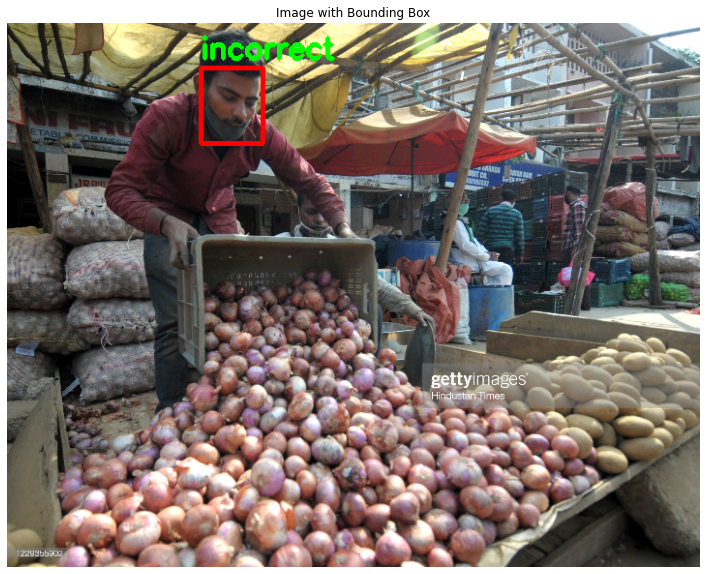

Image: (423, 716, 3)
Coordinates: (348, 76), (406, 138)


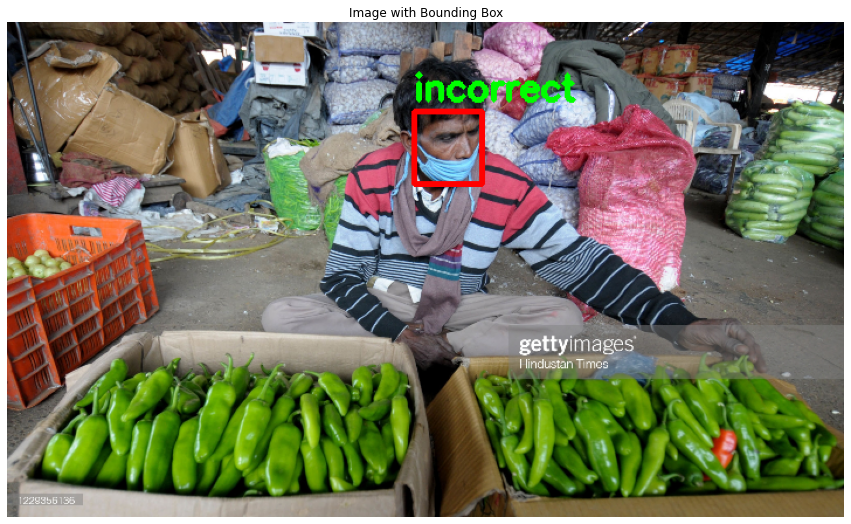

Image: (478, 716, 3)
Coordinates: (454, 102), (520, 178)


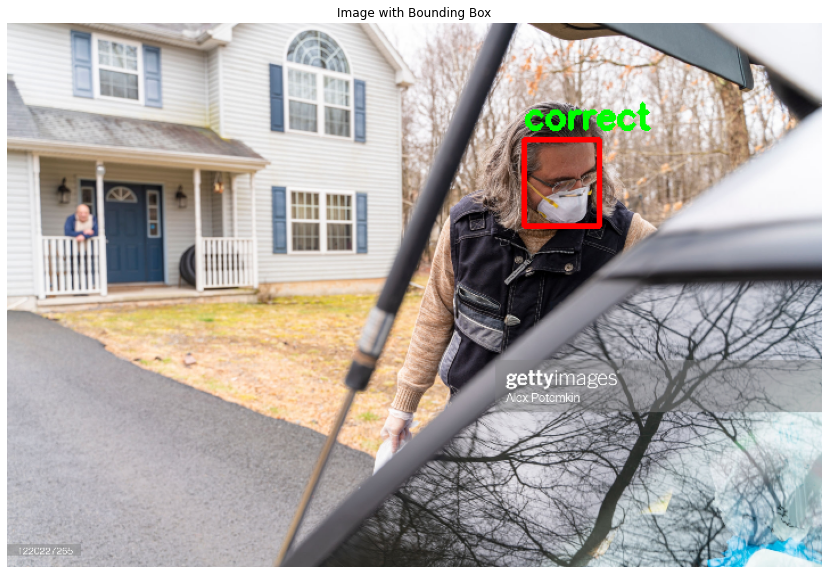

Image: (478, 716, 3)
Coordinates: (382, 37), (456, 139)


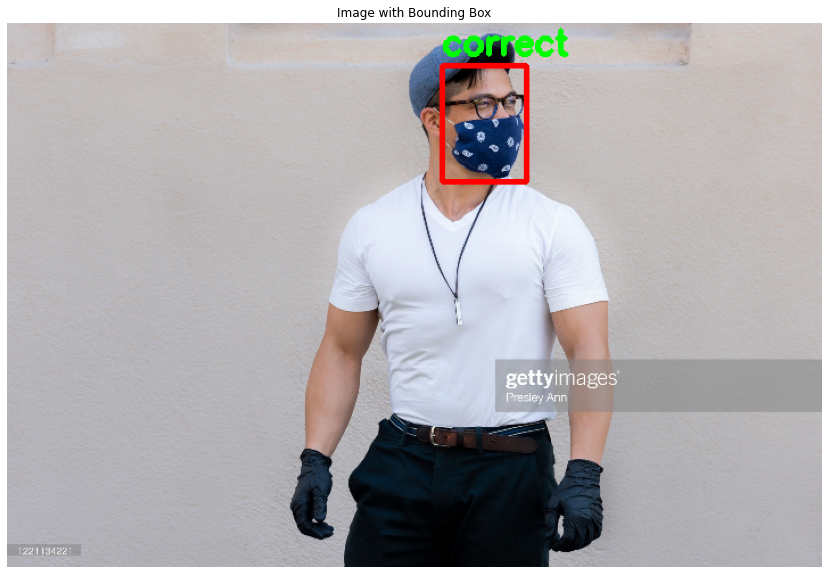

Image: (477, 716, 3)
Coordinates: (395, 157), (458, 230)


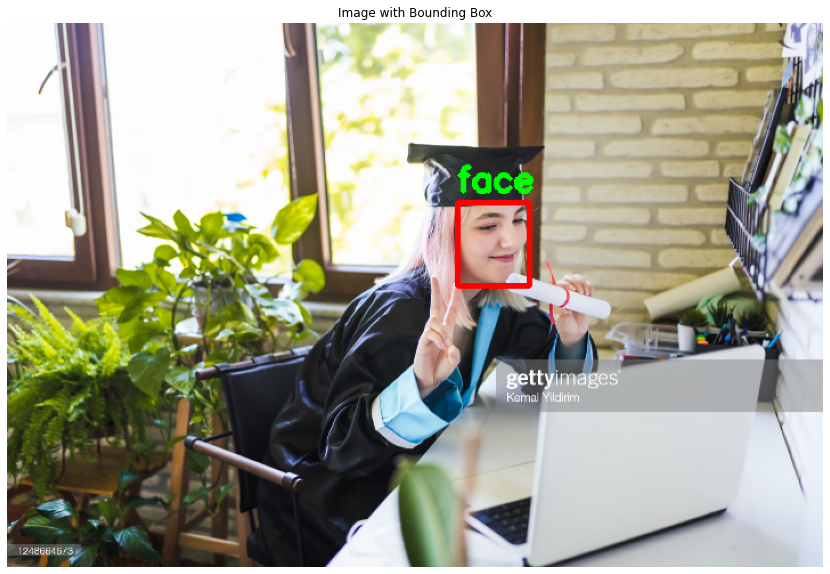

In [ ]:
for img_name in random.sample(list(least_objects_img_ids), 5):
  plot_bbox(img_name)

### Write train.csv to annotation.txt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# for training
with open("train_annotation.txt", "w+") as f:
  for idx, row in train_df.iterrows():
      url = '/content/images/train' + str(row['filename'])
      img = cv2.imread(url)
      x1 = row['xmin']
      x2 = row['xmax']
      y1 = row['ymin']
      y2 = row['ymax']
    
      fileName = row['filename']
      className = row['class']
      f.write(fileName + ',' + str(x1) + ',' + str(y1) + ',' + str(x2) + ',' + str(y2) + ',' + className + '\n')

In [ ]:
# for training
with open("test_annotation.txt", "w+") as f:
  for idx, row in test_df.iterrows():
      url = '/content/images/test' + str(row['filename'])
      img = cv2.imread(url)
      x1 = row['xmin']
      x2 = row['xmax']
      y1 = row['ymin']
      y2 = row['ymax']
    
      fileName = row['filename']
      className = row['class']
      f.write(fileName + ',' + str(x1) + ',' + str(y1) + ',' + str(x2) + ',' + str(y2) + ',' + className + '\n')

In [ ]:
url_train = "/content/drive/MyDrive/Colab Notebooks/Machine Learning/Faster_RCNN_for_Open_Images_Dataset_Keras/"

In [ ]:
!cp /content/test_annotation.txt /content/drive/MyDrive/share

!cp /content/train_annotation.txt /content/drive/MyDrive/share
